Domínio da Frequência

Tutorial de referência
# https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html

In [212]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Carregue a imagem e calcule sua transformada de Fourier
Utilizar a biblioteca CV2 para o cálculo

https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d


Indique qual o tamanho da imagem original e da imagem resultante da transformada. São iguais ou diferentes? Justifique


(808, 1332, 2)
-1198549.5
93460184.0
-2504974.5
2504974.5


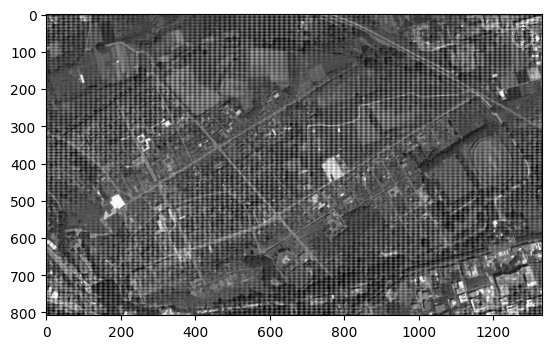

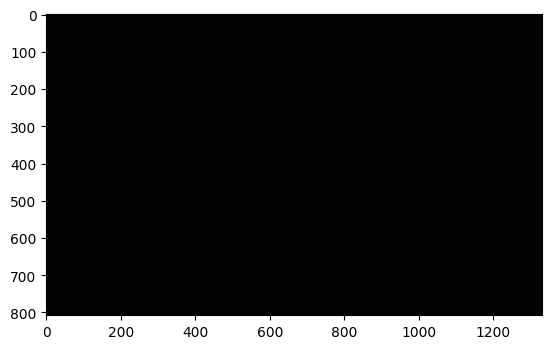

In [213]:
# now we will be loading the image and converting it to grayscale

#img = cv2.imread("chair_texture.jpg")
img = cv2.imread("aerialpompeiiperiodic.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# A entrada da função deve ser do tipo float32, então é necessário converter
# > (np.float32(gray)
# Sobre a saída: When DFT_COMPLEX_OUTPUT is set, the output is a complex matrix of the same size as input.
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

#code here
print(fourier.shape)
print(np.min(fourier[:,:,0]))
print(np.max(fourier[:,:,0]))
print(np.min(fourier[:,:,1]))
print(np.max(fourier[:,:,1]))

plt.imshow(img, cmap='gray');
plt.show()

plt.imshow(fourier[:,:,0], cmap='gray');
plt.show()


2) Mostrar o espectro de Fourier. Para isso basta calcular a magnitude de cada posição do matriz, lembrando que ela é um número complexo

Mostra o valor mínimo e máximo da magnitude

Mostre o histograma de valores da magnitude. Discuta sobre essa distribuição. Qual é a distância entre o valor máximo e o valor mínimo de magnitude?

(808, 1332)
0.8471321
93460184.0


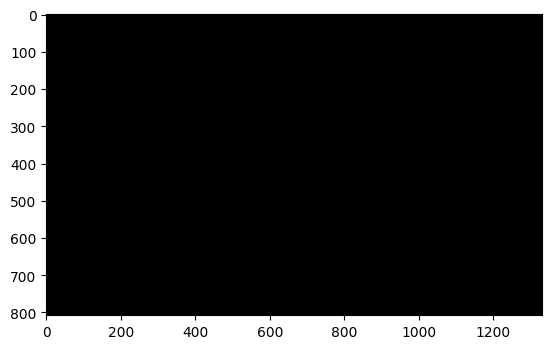

In [214]:
# obtendo a parte real da DFT
fourier_real = fourier[:,:,0]
fourier_imaginario = fourier[:,:,1]

fourier_mag =  np.sqrt(np.power(fourier_real,2) + np.power(fourier_imaginario,2))

# distância dos valores max e min
dist = np.max(fourier_mag)-np.min(fourier_mag)
print(fourier_mag.shape)
print(np.min(fourier_mag))
print(np.max(fourier_mag))

plt.imshow(fourier_mag, cmap='gray');
plt.show()


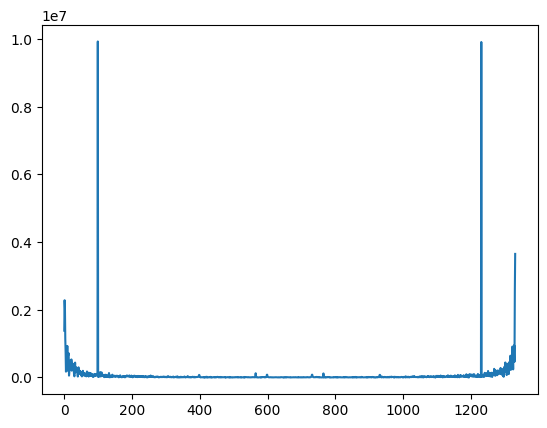

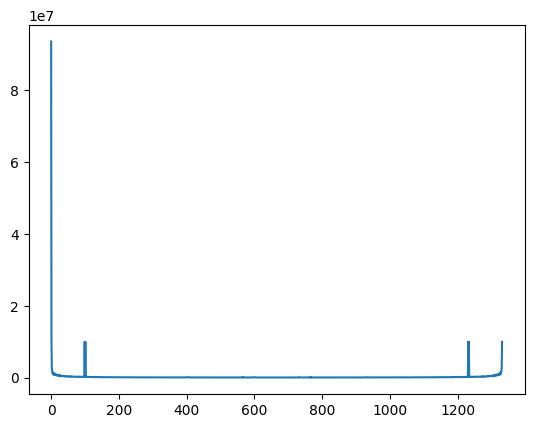

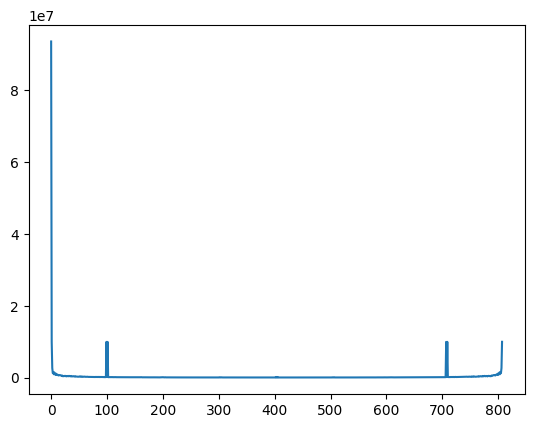

[93460184.   9931059.   9931059.   9914817.   9914817.   9912482.
  9912482.   9905863.   9905863.   3652546.8  3652546.8  2646866.2
  2646866.2  2565320.   2565320.   2283424.8  2283424.8  2236522.5
  2236522.5  2031592.4  2031592.4  1924744.9  1924744.9  1616506.
  1616506.   1545238.4  1545238.4  1414800.4  1414800.4  1393780.8
  1393780.8  1383760.5  1383760.5  1360581.9  1360581.9  1277485.2
  1277485.2  1270634.4  1270634.4  1201319.9  1201319.9  1189016.9
  1189016.6  1142716.9  1142716.9  1085937.2  1085937.2  1085088.
  1085088.   1053833.4]


In [215]:
# Analisando os intervalos de valores da magnitude

#nova parte
meio = fourier_mag.shape[0] //2
fim =  fourier_mag.shape[0] -1;
linha = fourier_mag[fim,:];
plt.plot(linha);
plt.show()

# obtendo os valores máximos por linha
max_linhas = np.max(fourier_mag,0);
plt.plot(max_linhas);
plt.show()

# obtendo os valores máximos por coluna
max_colunas = np.max(fourier_mag,1);
plt.plot(max_colunas);
plt.show()

fourier_mag_sorted=np.flip(np.sort(fourier_mag,None))

print(fourier_mag_sorted[0:50])



1.0762330000000000000000000e+06
1.4000000000000000000000000e+01
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
8.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.0000000000000000000000000e+00
0.000000

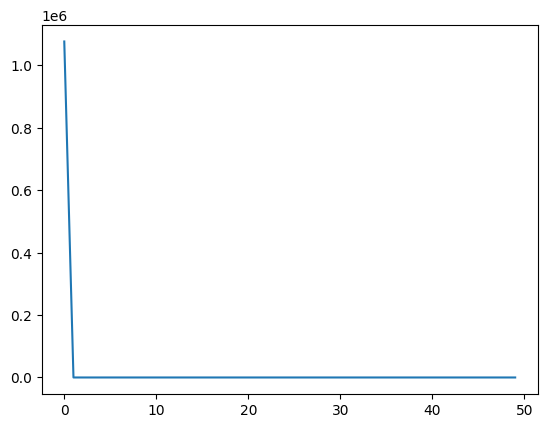

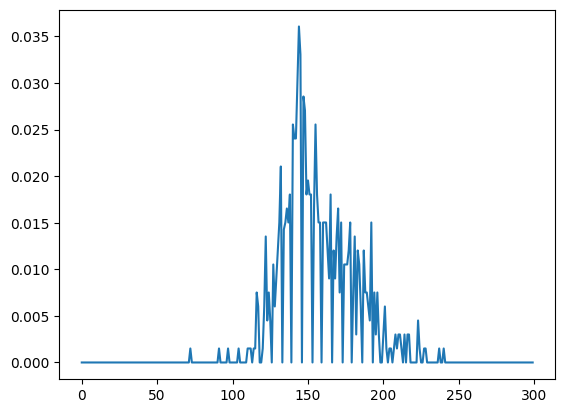

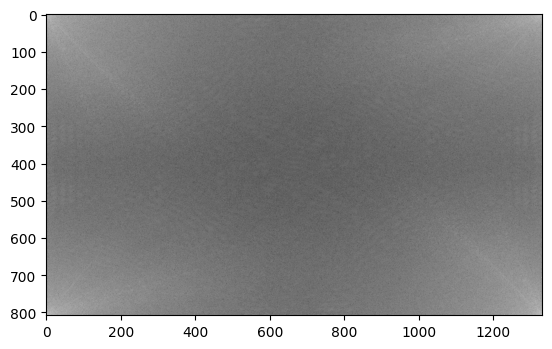

In [216]:

tohist = fourier_mag
bins = 50
ranges = [np.min(tohist),np.max(tohist)+np.max(tohist)/bins/2]
h=cv2.calcHist([tohist],[0],None,[bins],ranges, True)
for hi in h:
    print(np.format_float_scientific(hi, unique=False, precision=25))

print(np.sum(h))
print(ranges)
# Plote o histograma

plt.plot(h)
plt.show()

fourier_mag_log = np.log(fourier_mag)

magnitude = fourier_mag_log
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
h_magnitude=cv2.calcHist(magnitude,[0],None,[300],[0,np.max(magnitude)])
h_magnitude = h_magnitude/sum(h_magnitude)

# Plote o histograma
plt.plot(h_magnitude)
plt.show()

plt.imshow(magnitude, cmap='gray', vmin=0, vmax=255);
plt.show()



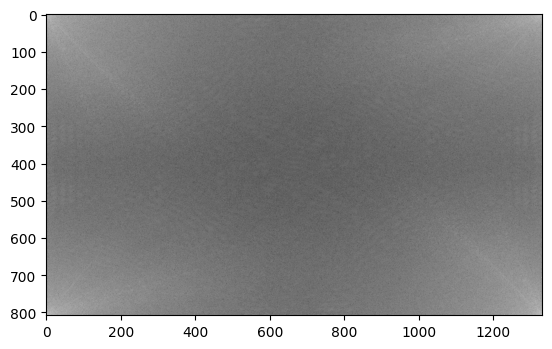

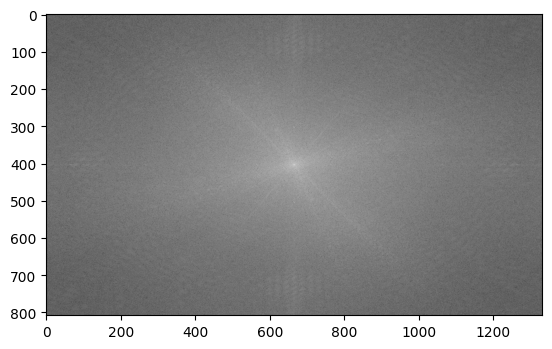

In [217]:

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)
# calculate the magnitude of the Fourier Transform
magnitude_shift = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
# Scale the magnitude for display
magnitude_shift = cv2.normalize(magnitude_shift, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)


plt.imshow(magnitude, cmap='gray', vmin=0, vmax=255);
plt.show()
plt.imshow(magnitude_shift, cmap='gray', vmin=0, vmax=255);
plt.show()

cv2.imwrite("fftshift.png",magnitude_shift);



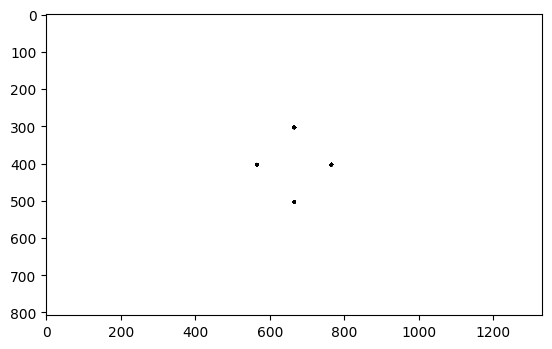

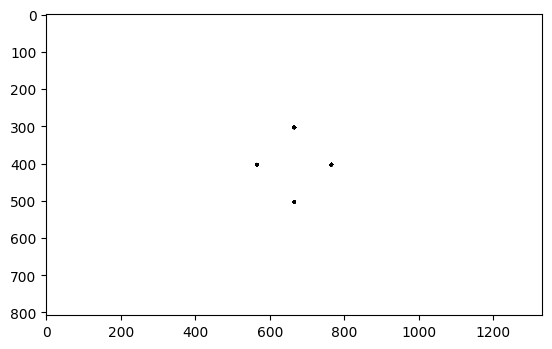

In [224]:

readmask = True;

row = img.shape[0]
col = img.shape[1]
mask = np.zeros((row, col, 2), np.uint8)
if readmask:
    mask_im = cv2.imread('fftshift_mask.png',cv2.IMREAD_GRAYSCALE);
    mask[:,:,0] = mask_im;
    mask[:,:,1] = mask_im;
else:
    center_row, center_col = row // 2, col // 2
     
    Y, X = np.ogrid[:row, :col]
    dist_from_center = np.sqrt((X - center_col)**2 + (Y-center_row)**2)
    radius = 100;
    mask_template = dist_from_center <= radius
    mask[:,:,0] = mask_template;
    mask[:,:,1] = mask_template;

plt.imshow(mask[:,:,0], cmap='gray', vmin=0, vmax=1);
plt.show()
plt.imshow(mask[:,:,1], cmap='gray', vmin=0, vmax=1);

# create a mask with a centered square of 1s
#msize = 30
#mask = np.zeros((row, col, 2), np.uint8)
## square mask
#mask[center_row - msize:center_row + msize, center_col - msize:center_col + msize] = 1
##print(mask.shape)
#plt.imshow(mask[:,:,0], cmap='gray', vmin=0, vmax=1);



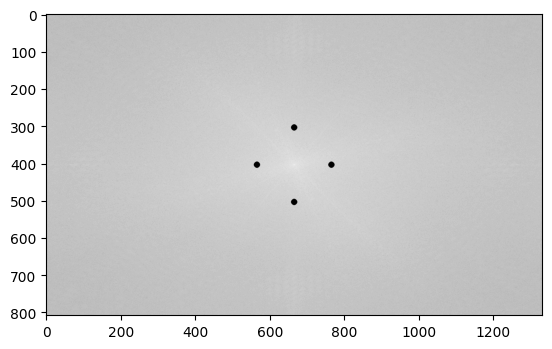

In [225]:
#multiplicando a máscara pela transformada de fourier
fourier_shift_masked = fourier_shift * mask +0.000000001;

# Scale the magnitude for display
magnitude = 20*np.log(cv2.magnitude(fourier_shift_masked[:,:,0],fourier_shift_masked[:,:,1]))
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

plt.imshow(magnitude, cmap='gray', vmin=0, vmax=255);



(808, 1332, 2)
2249393200.0
71826740000.0
-3421.8328
3506.5815


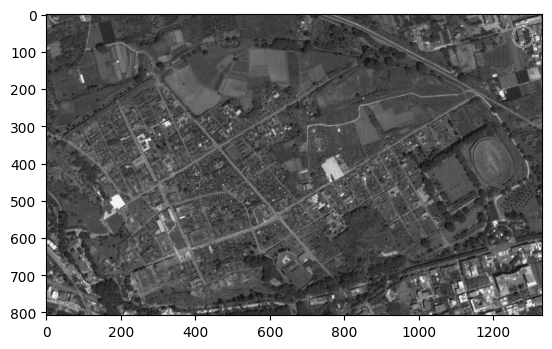

In [226]:

fourier_shift_masked_ishift = np.fft.ifftshift(fourier_shift_masked)
#fft_ifft_shift = np.fft.ifftshift(fourier_shift)
inverse_fourier = cv2.idft(fourier_shift_masked_ishift);

#code here
print(inverse_fourier.shape)
print(np.min(inverse_fourier[:,:,0]))
print(np.max(inverse_fourier[:,:,0]))
print(np.min(inverse_fourier[:,:,1]))
print(np.max(inverse_fourier[:,:,1]))

result = cv2.magnitude(inverse_fourier[:,:,0], inverse_fourier[:,:,1])
result = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

plt.imshow(result, cmap='gray', vmin=0, vmax=255);
plt.show()